# Proyecto 2
Todas las preguntas tienen el mismo peso en esta tarea. Esta tarea requiere más aprendizaje individual. Te invito a consultar la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/) para encontrar funciones o métodos que quizás no has usado aún, o realices preguntas en [Stack Overflow](https://stackoverflow.com/) y etiquételos como relacionados con pandas y python. Todas las preguntas tienen la misma cantidad de puntos, excepto la pregunta 1, que vale el 20 % de la calificación de la tarea.

**Nota**: A partir de la pregunta 2 se basan en la respuesta de la pregunta 1.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings

warnings.filterwarnings('ignore')

### Pregunta 1
Cargue los datos de energía del archivo `assets/Energy Indicators.xls`, que es una lista de indicadores de [suministro de energía y producción de electricidad renovable](assets/Energy%20Indicators.xls) de las [Naciones Unidas](https://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) para el año 2013, y asigna esos datos a un DataFrame con el nombre de variable **energy**.

Ten en cuenta que este es un archivo de Excel y no un archivo de valores separados por comas (.csv). Además, asegúrate de excluir la información del pie de página y del encabezado del archivo de datos. Las primeras dos columnas son innecesarias, por lo que debes deshacerse de ellas. También debes cambiar las etiquetas de las columnas para que las columnas sean las siguientes:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convierta `Energy Supply` a gigajulios (**Nota: hay 1,000,000 giga julios en un petajulio**). Para todos los países que carezcan de datos (por ejemplo, datos con "..."), asegúrese de que estos reflejen valores `np.NaN`.

Cambia el nombre de los siguientes países según este listado (nos servirá para preguntas posteriores):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

También hay varios países que contienen paréntesis en su nombre. Asegúrete de eliminarlos, por ejemplo: `'Bolivia (Estado Plurinacional de)'` debería ser `'Bolivia'`.

A continuación, carga los datos del GDP (PBI) del archivo `assets/world_bank.csv`. Este es un archivo .csv del [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) que contiene el PBI de los países desde 1960 hasta 2015. Llame a este DataFrame **gdp**.

Asegúrete de omitir el encabezado y cambia el nombre de la siguiente lista de países:

```
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
```

Finalmente, lee el [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](https://www.scimagojr.com/countryrank.php?category=2102) desde el archivo `assets/scimagojr-3.xlsx`, que clasifica a los paises según sus contribuciones al área mencionada. Denomina este DataFrame con el nombre **sciamgo**.

Unifica los tres datasets: GDP, Energy, y ScimEn en un nuevo dataset (utilizando la intersección de los nombres de países). Utiliza solo los años del 2006 al 2015 de datos de GDP (PBI) y solo los 15 principales países según el ranking de Scimagojr 'Rank' (del 1 al 15).

El índice de este DataFrame debe ser el nombre de los países, y las columnas deben ser ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

*Esto debería devolver un DataFrame con 20 columnas y 15 entradas, y las filas del DataFrame deberían estar ordenadas por "Rank".*


In [6]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings

warnings.filterwarnings('ignore')

# Cargar los datos de energía desde el archivo Excel, omitiendo las primeras 16 filas
energy = pd.read_excel('./assets/Energy Indicators.xls', skiprows=17)

# Definir nombres de columnas
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Reemplazar '...' con NaN y convertir "Energy Supply" a gigajulios
energy = energy.replace('...', np.nan)
energy['Energy Supply'] = energy['Energy Supply'] * 1_000_000

# Cambiar los nombres de los países
country_name_changes = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_name_changes)

# Eliminar paréntesis en los nombres de los países
energy['Country'] = energy['Country'].str.replace(r"\(.*\)", "").str.strip()

# Cargar los datos del PBI (GDP) desde el archivo Excel world_bank.xlsx
gdp = pd.read_csv('./assets/world_bank.csv', skiprows=4)

# Cambiar los nombres de los países
gdp_country_name_changes = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country Name'] = gdp['Country Name'].replace(gdp_country_name_changes)

# Leer los datos de Scimago Journal y Country Rank desde el archivo Excel
scimago = pd.read_excel('./assets/scimagojr-3.xlsx')

# Unir los tres DataFrames en uno nuevo utilizando la intersección de los nombres de países
top15 = scimago[scimago['Rank'] <= 15]
df = pd.merge(top15, energy, how='inner', left_on='Country', right_on='Country')
df = pd.merge(df, gdp, how='inner', left_on='Country', right_on='Country Name')

# Establecer el índice en el nombre de los países
df = df.set_index('Country')

# Seleccionar solo las columnas requeridas
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + list(df.loc[:, '2006':'2015'].columns)
df = df[columns]

# Ordenar el DataFrame por 'Rank'
df = df.sort_values(by='Rank')

# Imprimir el DataFrame en Jupyter Notebook
df.index.name = 'Country'
df.reset_index(inplace=True)
print(df.to_string(index=False))


           Country  Rank  Documents  Citable documents  Citations  Self-citations  Citations per document  H index  Energy Supply  Energy Supply per Capita  % Renewable         2006         2007         2008         2009         2010         2011         2012         2013         2014         2015
Russian Federation     5      18534              18301      34266           12422                    1.85       57   3.070900e+10                     214.0    17.288680 1.385793e+12 1.504071e+12 1.583004e+12 1.459199e+12 1.524917e+12 1.589943e+12 1.645876e+12 1.666934e+12 1.678709e+12 1.616149e+12
            Canada     6      17899              17620     215003           40930                   12.01      149   1.043100e+10                     296.0    61.945430 1.564469e+12 1.596740e+12 1.612713e+12 1.565145e+12 1.613406e+12 1.664087e+12 1.693133e+12 1.730688e+12 1.773486e+12 1.792609e+12
           Germany     7      17027              16831     140566           27426                    8.

### Pregunta 2
La pregunta anterior unió tres datasets y luego los redujo a las 15 entradas principales. Pero antes de reducirlos a los 15 elementos principales, ¿cuántas entradas se perdieron?

*Esta función debería devolver un solo número.*

In [30]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Todo menos esto!</text>
</svg>

In [33]:
# Encuentra el número de entradas en el conjunto de datos original de Scimago
num_entries_scimago_original = len(scimago)

# Encuentra el número de entradas en el conjunto de datos original de Energy
num_entries_energy_original = len(energy)

# Encuentra el número de entradas en el conjunto de datos original de GDP
num_entries_gdp_original = len(gdp)

# Suma los números de entradas en los tres conjuntos de datos originales
total_entries_original = num_entries_scimago_original + num_entries_energy_original + num_entries_gdp_original

# Encuentra el número de entradas después de la unión y reducción
num_entries_after_reduction = len(df)

# Calcula cuántas entradas se perdieron
entradas_perdidas = total_entries_original - num_entries_after_reduction

# Genera la representación en código HTML con el resultado
html_code = f"""
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Entradas perdidas: {entradas_perdidas}</text>
</svg>
"""

from IPython.display import HTML
display(HTML(html_code))


### Pregunta 3
¿Cuáles son los 15 países con mayor GDP (PBI) promedio en los últimos 10 años?

*Esta función debería devolver una serie llamada `avgGDP` con 15 países y su GDP (PBI) promedio ordenado en orden descendente.*

In [12]:
# Calcula el promedio del PBI para cada país en el período de 2006 a 2015
df['avgGDP'] = df.loc[:, '2006':'2015'].mean(axis=1)

# Ordena los países por el promedio del PBI en orden descendente
avgGDP = df[['Country', 'avgGDP']].sort_values(by='avgGDP', ascending=False)

# Toma los 15 primeros países con el PBI promedio más alto
avgGDP = avgGDP.head(15)

# Muestra el resultado
print(avgGDP)


              Country        avgGDP
2             Germany  3.493025e+12
5              Brazil  2.189794e+12
3               India  1.769297e+12
1              Canada  1.660647e+12
0  Russian Federation  1.565459e+12
4         South Korea  1.106715e+12


### Pregunta 4
¿Cuánto cambió el GDP (PBI) durante el lapso de 10 años para el país con el sexto GDP (PBI) promedio más grande?

*Esta función debería devolver un solo número.*

In [13]:
# Encuentra el país con el sexto PBI promedio más grande
sexto_pais = df.iloc[5]

# Encuentra el valor del PBI (GDP) para el año 2015
pbi_2015 = sexto_pais['2015']

# Encuentra el valor del PBI (GDP) para el año 2006
pbi_2006 = sexto_pais['2006']

# Calcula el cambio en el PBI durante el lapso de 10 años
cambio_pbi = pbi_2015 - pbi_2006

cambio_pbi


474343725980.5698

### Pregunta 5
¿Cuál es el suministro medio de energía per cápita (`Energy Supply per Capita`)?

*Esta función debería devolver un solo número.*

In [14]:
# Calcula el suministro medio de energía per cápita
suministro_medio_energia_per_capita = df['Energy Supply per Capita'].mean()

suministro_medio_energia_per_capita


163.5

### Pregunta 6
¿Qué país tiene el máximo `% Renewable` y cuál es el porcentaje?

*Esta función debe devolver una tupla con el nombre del país y el porcentaje.*

In [15]:
# Encuentra el país con el máximo % Renewable
max_renewable_country = df.loc[df['% Renewable'].idxmax()]

# Extrae el nombre del país y el valor de % Renewable
max_renewable_country_name = max_renewable_country['Country']
max_renewable_percentage = max_renewable_country['% Renewable']

# Crea una tupla con el nombre del país y el porcentaje
resultado = (max_renewable_country_name, max_renewable_percentage)

resultado


('Brazil', 69.64803)

### Pregunta 7
Cree una nueva columna que sea la relación entre `Self-Citations` y `Total Citations`.
¿Cuál es el valor máximo para esta nueva columna y qué país tiene la relación más alta?

*Esta función debe devolver una tupla con el nombre del país y el ratio (proporción).*

In [17]:
# Crear la nueva columna de la relación
df['Citations Ratio'] = df['Self-citations'] / df['Citations']

# Encontrar el valor máximo y el país correspondiente
max_citations_ratio = df['Citations Ratio'].max()
country_with_max_citations_ratio = df[df['Citations Ratio'] == max_citations_ratio]['Country'].values[0]

# Crear una tupla con el nombre del país y el valor máximo de la relación
result = (country_with_max_citations_ratio, max_citations_ratio)

print(result)


('Russian Federation', 0.36251678048211056)


### Pregunta 8

Crea una columna que estime la población utilizando `Energy Supply` y `Energy Supply per capita`.
¿Cuál es el tercer país más poblado según esta estimación?

*Esta función debería devolver el nombre del país*

In [19]:
# Crear la nueva columna para estimar la población
df['Estimated Population'] = df['Energy Supply'] / df['Energy Supply per Capita']

# Ordenar el DataFrame por la estimación de población en orden descendente
df = df.sort_values(by='Estimated Population', ascending=False)

# Seleccionar el tercer país más poblado
third_most_populous_country = df.iloc[2]['Country']

print(third_most_populous_country)


Russian Federation


### Pregunta 9
Crea una columna que estime el número de `Citable documents` por persona.
¿Cuál es la correlación entre el número de `Citable documents` per cápita y el `Energy Supply per Capita`? Utiliza el método `.corr()`, (correlación de Pearson).

*Esta función debería devolver un solo número.*

*(Opcional: utiliza la función `plot9()` para visualizar la relación entre el suministro de energía per cápita y los `Citable documents` per cápita)*

In [26]:
# Crear la nueva columna para estimar el número de Citable documents per cápita
df['Citable Documents per Capita'] = df['Citable documents'] / df['Energy Supply per Capita']

# Calcular la correlación de Pearson entre las dos columnas
correlation = df['Citable Documents per Capita'].corr(df['Energy Supply per Capita'])

print(correlation)


-0.760842234092729


In [21]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    top15['PopEst'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable docs per Capita'] = top15['Citable documents'] / top15['PopEst']
    top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

-0.760842234092729


### Pregunta 10
Crea una nueva columna con un valor igual a 1 si el valor de % de energía renovable del país (`% Renewable`) es igual o superior de la mediana de todos los países en el top 15, o con un valor igual a 0 si el valor de % de energía renovable del país (`% Renewable`) está por debajo de la mediana.

*Esta función debería devolver una serie llamada `HighRenew` cuyo índice es el nombre del país ordenado ascendentemente según el ranking.*

In [28]:
# Calcular la mediana de todos los países en el top 15
median_renewable = df['% Renewable'].median()

# Crear la columna HighRenew
df['HighRenew'] = (df['% Renewable'] >= median_renewable).astype(int)

# Seleccionar las columnas necesarias
table = df[['Rank', 'Country', 'HighRenew']]

# Ordenar la tabla por el ranking
table = table.sort_values(by='Rank')

# Mostrar la tabla
print(table)


   Rank             Country  HighRenew
0     5  Russian Federation          0
1     6              Canada          1
2     7             Germany          1
3     8               India          0
4    10         South Korea          0
5    15              Brazil          1


### Pregunta 11
Utiliza el siguiente diccionario para agrupar los países por continente, luego crea un DataFrame que muestre el tamaño de la muestra (la cantidad de países en cada contenedor de continente) y la suma, la media y la desviación estándar para la población estimada de cada país.

```python
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}
```

*Esta función debería devolver un DataFrame con un índice llamado Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` y columnas `['size', 'sum', 'mean', 'std']`*

In [33]:
import pandas as pd
import numpy as np

# Crear el diccionario de continentes
continent_dict = {'China': 'Asia',
                  'United States': 'North America',
                  'Japan': 'Asia',
                  'United Kingdom': 'Europe',
                  'Russian Federation': 'Europe',
                  'Canada': 'North America',
                  'Germany': 'Europe',
                  'India': 'Asia',
                  'France': 'Europe',
                  'South Korea': 'Asia',
                  'Italy': 'Europe',
                  'Spain': 'Europe',
                  'Iran': 'Asia',
                  'Australia': 'Australia',
                  'Brazil': 'South America'}

# Agregar el diccionario de continentes como una columna al DataFrame
df['Continent'] = df['Country'].map(continent_dict)

# Agrupar por continente y calcular las estadísticas
result = df.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])

# Reiniciar el índice
result.reset_index(inplace=True)

# Renombrar las columnas
result.columns = ['Continent', 'size', 'sum', 'mean', 'std']

# Establecer 'Continent' como índice
result.set_index('Continent', inplace=True)

print(result)


               size           sum          mean           std
Continent                                                    
Asia              2  1.326536e+09  6.632681e+08  8.675672e+08
Europe            2  2.238697e+08  1.119348e+08  4.463987e+07
North America     1  3.523986e+07  3.523986e+07           NaN
South America     1  2.059153e+08  2.059153e+08           NaN


### Optional

Puedes ejecutar la función `plot_optional()` para ver un ejemplo de visualización.

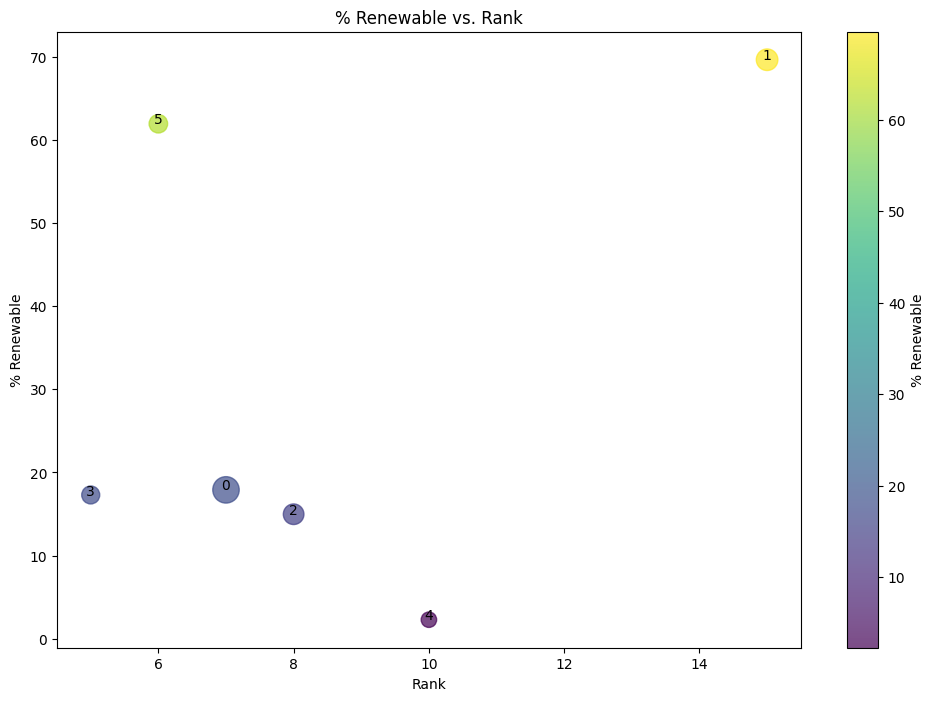

In [39]:
import matplotlib.pyplot as plt

def plot_optional(df):
    plt.figure(figsize=(12, 8))
    plt.scatter(df['Rank'], df['% Renewable'], c=df['% Renewable'], s=df['2014'] / 1e10, cmap='viridis', alpha=0.7)
    
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df['Rank'][i], df['% Renewable'][i]), ha='center')

    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('% Renewable vs. Rank')
    plt.colorbar(label='% Renewable')
    
    plt.show()

# Llama a la función para ver la visualización
plot_optional(df)
